# Neural Networks With TensorFlow
## Stable implementation

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import variance_scaling_initializer # He-initializer
import matplotlib.pyplot as plt
from jupyter_tf_graph import show_graph

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.reshape(-1, 28 * 28) / 255.0
X_test = X_test.reshape(-1, 28 * 28) / 255.0

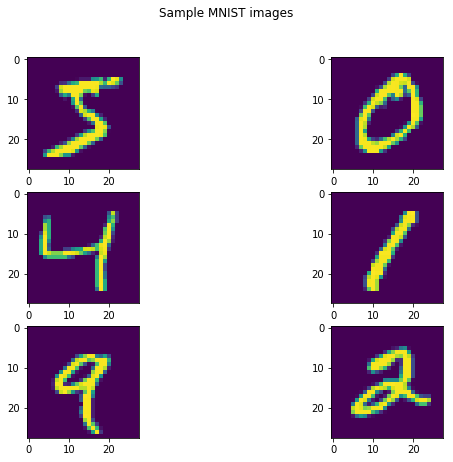

In [3]:
np.random.seed(1643)
img_ixs = np.random.randint(0, X_train.shape[0], 6)
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Sample MNIST images")
for ix, img_ixs in enumerate(img_ixs):
    ax = fig.add_subplot(3, 2, ix + 1)
    ax.imshow(X_train[ix].reshape(28, 28))

## Training a Fully Connected Deep Neural Network
### FFNN V.01
Feed forward neural network with sigmoid activation function and Gradient Descent Optimizer

In [67]:
tf.reset_default_graph()

logs = "./tf_logs/ffnn_v01"

n_inputs = 28 * 28
n_hidden = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=None, name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden, activation=tf.nn.sigmoid, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden, activation=tf.nn.sigmoid, name="hidden2")
    hidden3 = tf.layers.dense(hidden2, n_hidden, activation=tf.nn.sigmoid, name="hidden3")
    hidden4 = tf.layers.dense(hidden3, n_hidden, activation=tf.nn.sigmoid, name="hidden4")
    hidden5 = tf.layers.dense(hidden4, n_hidden, activation=tf.nn.sigmoid, name="hidden5")
    outputs = tf.layers.dense(hidden5, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
        labels=y,
        logits=outputs
    )
    loss = tf.reduce_mean(xentropy, name="loss")
    

alpha = 0.001
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(alpha)
    train_step = optimizer.minimize(loss)

with tf.name_scope("metrics"):
    correct = tf.nn.in_top_k(outputs, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")
    tb_train_writer = tf.summary.FileWriter(logs + "/train", tf.get_default_graph())
    tb_cv_writer = tf.summary.FileWriter(logs + "/cv", tf.get_default_graph())
    tb_accuracy = tf.summary.scalar("Accuracy", accuracy)
    
init = tf.global_variables_initializer()

In [68]:
%%time
epochs = 400
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        sess.run(train_step, feed_dict={X: X_train, y: y_train})
        acc, tb_acc = sess.run([accuracy, tb_accuracy], feed_dict={X: X_train, y: y_train})
        cvacc, tb_cvacc = sess.run([accuracy, tb_accuracy], feed_dict={X: X_test, y: y_test})
        tb_train_writer.add_summary(tb_acc, epoch)
        tb_cv_writer.add_summary(tb_cvacc, epoch)
        
        end = "\n" if epoch % 40 == 0 else "\r"
        print(f"@Epoch {epoch: 03}: Train Accuracy {acc:07.2%} | Test Accuracy {cvacc:07.2%}",
              end=end)

@Epoch  00: Train Accuracy 009.87% | Test Accuracy 009.80%
@Epoch  40: Train Accuracy 009.87% | Test Accuracy 009.80%
@Epoch  80: Train Accuracy 009.87% | Test Accuracy 009.80%
@Epoch  120: Train Accuracy 009.87% | Test Accuracy 009.80%
@Epoch  160: Train Accuracy 009.87% | Test Accuracy 009.80%
@Epoch  200: Train Accuracy 009.87% | Test Accuracy 009.80%
@Epoch  240: Train Accuracy 009.87% | Test Accuracy 009.80%
@Epoch  280: Train Accuracy 011.24% | Test Accuracy 011.35%
@Epoch  320: Train Accuracy 011.24% | Test Accuracy 011.35%
@Epoch  360: Train Accuracy 011.24% | Test Accuracy 011.35%
CPU times: user 24min 36s, sys: 4min 15s, total: 28min 51s%
Wall time: 6min 50s


----
### FFNN V.02
Feed forward neural network with elu activation function and Gradient Descent Optimizer

In [69]:
tf.reset_default_graph()

logs = "./tf_logs/ffnn_v02"

n_inputs = 28 * 28
n_hidden = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=None, name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden, activation=tf.nn.elu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden, activation=tf.nn.elu, name="hidden2")
    hidden3 = tf.layers.dense(hidden2, n_hidden, activation=tf.nn.elu, name="hidden3")
    hidden4 = tf.layers.dense(hidden3, n_hidden, activation=tf.nn.elu, name="hidden4")
    hidden5 = tf.layers.dense(hidden4, n_hidden, activation=tf.nn.elu, name="hidden5")
    outputs = tf.layers.dense(hidden5, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
        labels=y,
        logits=outputs
    )
    loss = tf.reduce_mean(xentropy, name="loss")
    

alpha = 0.001
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(alpha)
    train_step = optimizer.minimize(loss)

with tf.name_scope("metrics"):
    correct = tf.nn.in_top_k(outputs, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")
    tb_train_writer = tf.summary.FileWriter(logs + "/train", tf.get_default_graph())
    tb_cv_writer = tf.summary.FileWriter(logs + "/cv", tf.get_default_graph())
    tb_accuracy = tf.summary.scalar("Accuracy", accuracy)
    
init = tf.global_variables_initializer()

In [70]:
%%time
epochs = 400
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        sess.run(train_step, feed_dict={X: X_train, y: y_train})
        acc, tb_acc = sess.run([accuracy, tb_accuracy], feed_dict={X: X_train, y: y_train})
        cvacc, tb_cvacc = sess.run([accuracy, tb_accuracy], feed_dict={X: X_test, y: y_test})
        tb_train_writer.add_summary(tb_acc, epoch)
        tb_cv_writer.add_summary(tb_cvacc, epoch)
        
        end = "\n" if epoch % 40 == 0 else "\r"
        print(f"@Epoch {epoch: 03}: Train Accuracy {acc:07.2%} | Test Accuracy {cvacc:07.2%}",
              end=end)

@Epoch  00: Train Accuracy 006.13% | Test Accuracy 006.11%
@Epoch  40: Train Accuracy 009.70% | Test Accuracy 009.56%
@Epoch  80: Train Accuracy 014.78% | Test Accuracy 014.49%
@Epoch  120: Train Accuracy 021.02% | Test Accuracy 021.13%
@Epoch  160: Train Accuracy 027.68% | Test Accuracy 028.32%
@Epoch  200: Train Accuracy 033.88% | Test Accuracy 034.71%
@Epoch  240: Train Accuracy 039.29% | Test Accuracy 040.41%
@Epoch  280: Train Accuracy 043.42% | Test Accuracy 044.78%
@Epoch  320: Train Accuracy 047.05% | Test Accuracy 048.85%
@Epoch  360: Train Accuracy 050.14% | Test Accuracy 051.77%
CPU times: user 26min 10s, sys: 4min 11s, total: 30min 22s%
Wall time: 6min 56s


----
### FFNN V.03
Feed forward neural network with elu activation function and ADAM Optimizer

In [71]:
tf.reset_default_graph()

logs = "./tf_logs/ffnn_v03"

n_inputs = 28 * 28
n_hidden = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=None, name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden, activation=tf.nn.elu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden, activation=tf.nn.elu, name="hidden2")
    hidden3 = tf.layers.dense(hidden2, n_hidden, activation=tf.nn.elu, name="hidden3")
    hidden4 = tf.layers.dense(hidden3, n_hidden, activation=tf.nn.elu, name="hidden4")
    hidden5 = tf.layers.dense(hidden4, n_hidden, activation=tf.nn.elu, name="hidden5")
    outputs = tf.layers.dense(hidden5, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
        labels=y,
        logits=outputs
    )
    loss = tf.reduce_mean(xentropy, name="loss")
    

alpha = 0.001
with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(alpha)
    train_step = optimizer.minimize(loss)

with tf.name_scope("metrics"):
    correct = tf.nn.in_top_k(outputs, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")
    tb_train_writer = tf.summary.FileWriter(logs + "/train", tf.get_default_graph())
    tb_cv_writer = tf.summary.FileWriter(logs + "/cv", tf.get_default_graph())
    tb_accuracy = tf.summary.scalar("Accuracy", accuracy)
    
init = tf.global_variables_initializer()

In [72]:
%%time
epochs = 400
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        sess.run(train_step, feed_dict={X: X_train, y: y_train})
        acc, tb_acc = sess.run([accuracy, tb_accuracy],
                               feed_dict={X: X_train, y: y_train})
        cvacc, tb_cvacc = sess.run([accuracy, tb_accuracy],
                                   feed_dict={X: X_test, y: y_test})
        tb_train_writer.add_summary(tb_acc, epoch)
        tb_cv_writer.add_summary(tb_cvacc, epoch)
        
        end = "\n" if epoch % 40 == 0 else "\r"
        print(f"@Epoch {epoch: 03}: Train Accuracy {acc:07.2%} | Test Accuracy {cvacc:07.2%}",
              end=end)

@Epoch  00: Train Accuracy 025.93% | Test Accuracy 026.65%
@Epoch  40: Train Accuracy 091.63% | Test Accuracy 091.74%
@Epoch  80: Train Accuracy 094.57% | Test Accuracy 094.37%
@Epoch  120: Train Accuracy 096.32% | Test Accuracy 095.71%
@Epoch  160: Train Accuracy 097.35% | Test Accuracy 096.45%
@Epoch  200: Train Accuracy 098.10% | Test Accuracy 096.92%
@Epoch  240: Train Accuracy 098.75% | Test Accuracy 097.19%
@Epoch  280: Train Accuracy 098.96% | Test Accuracy 097.31%
@Epoch  320: Train Accuracy 099.46% | Test Accuracy 097.39%
@Epoch  360: Train Accuracy 099.69% | Test Accuracy 097.42%
CPU times: user 26min 11s, sys: 4min 17s, total: 30min 28s%
Wall time: 7min 14s


----
### FFNN V.04
Feed forward neural network with elu activation function, ADAM Optimizer and Batch Norm

In [88]:
tf.reset_default_graph()

logs = "./tf_logs/ffnn_v04/"

n_inputs = 28 * 28
n_hidden = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")
training = tf.placeholder_with_default(False, shape=(), name="training")

eta = 0.9
with tf.name_scope("dnn"):
    z1 = tf.layers.dense(X, n_hidden, name="z1")
    z1_bn = tf.layers.batch_normalization(z1, training=training, momentum=eta)
    a1 = tf.nn.elu(z1_bn)
    
    z2 = tf.layers.dense(a1, n_hidden, name="z2")
    z2_bn = tf.layers.batch_normalization(z2, training=training, momentum=eta)
    a2 = tf.nn.elu(z2_bn)
    
    z3 = tf.layers.dense(a2, n_hidden, name="z3")
    z3_bn = tf.layers.batch_normalization(z3, training=training, momentum=eta)
    a3 = tf.nn.elu(z3_bn)
    
    z4 = tf.layers.dense(a3, n_hidden, name="z4")
    z4_bn = tf.layers.batch_normalization(z4, training=training, momentum=eta)
    a4 = tf.nn.elu(z4)
    
    z5 = tf.layers.dense(a4, n_hidden, name="z5")
    z5_bn = tf.layers.batch_normalization(z5, training=training, momentum=eta)
    a5 = tf.nn.elu(z5_bn)
    
    output = tf.layers.dense(a5, n_hidden, name="output")


with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
        labels=y,
        logits=output
    )
    loss = tf.reduce_mean(xentropy, name="loss")

    
alpha = 0.001
with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(alpha)
    train_step = optimizer.minimize(loss)

    
with tf.name_scope("metrics"):
    correct = tf.nn.in_top_k(output, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")
    tb_train_writer = tf.summary.FileWriter(logs + "/train", tf.get_default_graph())
    tb_cv_writer = tf.summary.FileWriter(logs + "/cv", tf.get_default_graph())
    tb_accuracy = tf.summary.scalar("Accuracy", accuracy)

init = tf.global_variables_initializer()

In [89]:
%%time

# Operations to compute the mean and standard deviation of the minibatch
extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
epochs = 400
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        sess.run([train_step, extra_update_ops], feed_dict={training: True, X: X_train, y: y_train})
        acc, tb_acc = sess.run([accuracy, tb_accuracy],
                               feed_dict={X: X_train, y: y_train})
        cvacc, tb_cvacc = sess.run([accuracy, tb_accuracy],
                                    feed_dict={X: X_test, y: y_test})
        
        tb_train_writer.add_summary(tb_acc, epoch)
        tb_cv_writer.add_summary(tb_cvacc, epoch)
        
        end = "\n" if epoch % 40 == 0 else "\r"
        print(f"@Epoch {epoch:03}: Train Accuracy {acc:07.2%} | Test Accuracy {cvacc:07.2%}",
              end=end)

@Epoch  00: Train Accuracy 005.91% | Test Accuracy 005.43%
@Epoch  40: Train Accuracy 091.78% | Test Accuracy 092.06%
@Epoch  80: Train Accuracy 095.16% | Test Accuracy 094.87%
@Epoch  120: Train Accuracy 096.90% | Test Accuracy 096.05%
@Epoch  160: Train Accuracy 097.95% | Test Accuracy 096.75%
@Epoch  200: Train Accuracy 098.79% | Test Accuracy 097.07%
@Epoch  240: Train Accuracy 099.32% | Test Accuracy 097.29%
@Epoch  280: Train Accuracy 099.68% | Test Accuracy 097.37%
@Epoch  320: Train Accuracy 099.87% | Test Accuracy 097.45%
@Epoch  360: Train Accuracy 099.95% | Test Accuracy 097.43%
CPU times: user 47min 35s, sys: 6min 25s, total: 54min7.43%
Wall time: 10min 52s


## Feed Forward Neural Network Version Comparison
![FFNNs Comparisson](./images/ffnn_vs.png)

----
----
# Storing and Reusing TF Models

In [4]:
from functools import partial

def a_plus_b(a, b): return a + b
a_plus_3 = partial(a_plus_b, b=3)
a_plus_3(5)

8

## 1) Building and Storing the model

In [30]:
tf.reset_default_graph()

logs = "./tf_logs/ffnn_v05/"

n_inputs = 28 * 28
n_hidden = 100
n_output = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=None, name="y")

training = tf.placeholder_with_default(False, shape=(), name="training_bool")

eta = 0.9
batch_norm = partial(tf.layers.batch_normalization,
                     momentum=eta, training=training)

def hidden_layer(inputs, units, hi, activation=tf.nn.elu):
    """
    Create the hidden layer of a feed forward neural
    network with batch norm.
    """
    zi = tf.layers.dense(inputs, units, name=f"z{hi}")
    zi_bn = batch_norm(zi, name=f"z_bn{hi}")
    ai = activation(zi_bn, name=f"a{hi}")
    
    return ai


with tf.name_scope("dnn"):
    hidden = hidden_layer(X, n_hidden, 1)
    # Creating 5 ELU layers
    for h_ix in range(2, 6):
        hidden = hidden_layer(hidden, n_hidden, h_ix)
    output = tf.layers.dense(hidden, n_output, name="output")
    

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
        labels=y,
        logits=output
    )
    loss = tf.reduce_mean(xentropy, name="loss")

    
alpha = 0.005
with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(alpha)
    train_step = optimizer.minimize(loss, name="train_step")


with tf.name_scope("metrics"):
    correct = tf.nn.in_top_k(output, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")
    tb_train_writer = tf.summary.FileWriter(logs + "/train", tf.get_default_graph())
    tb_cv_writer = tf.summary.FileWriter(logs + "/cv", tf.get_default_graph())
    tb_acc = tf.summary.scalar("Accuracy", accuracy)
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [31]:
# Operations to compute the running mean and variance.
# ----------------------------------------------------
# In general, *tf.GraphKeys*, is a collection of names
# to collect and retrieve values associated with a graph
extra_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
model_path = "tfmodels/ffnn_v05.ckpt"
epochs = 400
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        sess.run([train_step, extra_ops], feed_dict={X: X_train, y: y_train,
                                                     training: True})
        acc, bn_train_acc = sess.run([accuracy, tb_acc], feed_dict={X: X_train, y:y_train})
        cvacc, bn_cv_acc = sess.run([accuracy, tb_acc], feed_dict={X: X_test, y:y_test})
        tb_train_writer.add_summary(bn_train_acc, epoch)
        tb_cv_writer.add_summary(bn_cv_acc, epoch)
        end = "\n" if epoch % 40 == 0 else "\r"
        print(f"@Epoch {epoch:03}: Train Accuracy {acc:07.2%} | Test Accuracy {cvacc:07.2%}",
              end=end)
    saver.save(sess, model_path)

@Epoch 000: Train Accuracy 043.06% | Test Accuracy 043.12%
@Epoch 040: Train Accuracy 096.41% | Test Accuracy 095.82%
@Epoch 080: Train Accuracy 098.79% | Test Accuracy 097.35%
@Epoch 120: Train Accuracy 098.74% | Test Accuracy 097.15%
@Epoch 160: Train Accuracy 099.95% | Test Accuracy 097.65%
@Epoch 200: Train Accuracy 100.00% | Test Accuracy 097.68%
@Epoch 240: Train Accuracy 100.00% | Test Accuracy 097.77%
@Epoch 280: Train Accuracy 100.00% | Test Accuracy 097.81%
@Epoch 320: Train Accuracy 100.00% | Test Accuracy 097.84%
@Epoch 360: Train Accuracy 100.00% | Test Accuracy 097.85%


## 2) Restoring the model

In [32]:
tf.reset_default_graph()

model = tf.train.import_meta_graph("./tfmodels/ffnn_v05.ckpt.meta")
new_model = tf.train.Saver()
new_model_path = "./tfmodels/ffnn_v05_1.ckpt"

X = tf.get_default_graph().get_tensor_by_name("X:0")
y = tf.get_default_graph().get_tensor_by_name("y:0")
training = tf.get_default_graph().get_tensor_by_name("training_bool:0")
accuracy = tf.get_default_graph().get_tensor_by_name("metrics/accuracy:0")
train_step = tf.get_default_graph().get_operation_by_name("train/train_step")

init = tf.global_variables_initializer()
bn_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
epochs = 40
with tf.Session() as sess:
    sess.run(init)
    model.restore(sess, "./tfmodels/ffnn_v05.ckpt")
    for epoch in range(epochs):
        sess.run([train_step, bn_ops], feed_dict={X: X_train, y: y_train,
                                                  training: True})
        acc = sess.run(accuracy, feed_dict={X: X_train, y: y_train})
        cvacc = sess.run(accuracy, feed_dict={X: X_test, y: y_test})
        end = "\n" if epoch % 10 == 0 else "\r"
        print(f"@Epoch {epoch:03}: Train Accuracy {acc:07.2%} | Test Accuracy {cvacc:07.2%}",
              end=end)
    new_model.save(sess, new_model_path)

INFO:tensorflow:Restoring parameters from ./tfmodels/ffnn_v05.ckpt
@Epoch 000: Train Accuracy 100.00% | Test Accuracy 097.84%
@Epoch 010: Train Accuracy 100.00% | Test Accuracy 097.84%
@Epoch 020: Train Accuracy 100.00% | Test Accuracy 097.83%
@Epoch 030: Train Accuracy 100.00% | Test Accuracy 097.83%


----
----
# Transfer Learning

In [25]:
from numpy.random import choice, seed
from functools import partial
from math import ceil

In [54]:
map_train_0_4 = y_train < 5
y_0_4_train = y_train[map_train_0_4] 
X_0_4_train = X_train[map_train_0_4,:]

map_test_0_4 = y_test < 5
y_0_4_test = y_test[map_test_0_4]
X_0_4_test = X_test[map_test_0_4, :]

### Deep Learning V.01
We being by training a feed-forward neural network with 5 hidden layers, elu activation function and he initializiation. In order to train this NNet, we consider Adam optimization and early stopping.

For educational purposes, we will consider the test-set as the validation set. Early stopping will kick in once the accuracy on the validation (test) set at epoch $t$ drops below the accuracy at epoch $t-1$.

In [134]:
tf.reset_default_graph()
logs = "./tf_logs/transfer/ffnn_0_4"

n_inputs = 28 * 28
n_hidden = 100
n_output = 5

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")
he_init = variance_scaling_initializer()

hidden_layer = partial(tf.layers.dense, units=n_hidden,
                       activation=tf.nn.elu,
                       kernel_initializer=he_init)

with tf.name_scope("DNN"):
    for hi in range(1, 6):
        if hi == 1:
            hidden = hidden_layer(inputs=X, name=f"hidden_{hi}")
        else:
            hidden = hidden_layer(inputs=hidden, name=f"hidden_{hi}")

    output = hidden_layer(inputs=hidden, units=n_output,
                          activation=None, name="output")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
        labels=y,
        logits=output)
    loss = tf.reduce_mean(xentropy, name="loss")


alpha = 0.01
with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(alpha)
    train_step = optimizer.minimize(loss, name="train_step")


with tf.name_scope("metrics"):
    correct = tf.nn.in_top_k(output, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")
    ### Writer Configuration ###
    writer_train = tf.summary.FileWriter(logs + "/train", tf.get_default_graph())
    writer_test = tf.summary.FileWriter(logs + "/test", tf.get_default_graph())
    writer_accuracy = tf.summary.scalar("Accuracy", accuracy)

init = tf.global_variables_initializer()
model_saver = tf.train.Saver()

In [135]:
epochs = 400
current_test_loss = 10 ** 10
max_stag_threshold = 20
current_stag = 0
mean_stag_val = 0

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        sess.run(train_step, feed_dict={X: X_0_4_train, y: y_0_4_train})
        train_acc, writer_train_acc = sess.run([accuracy, writer_accuracy],
                                               feed_dict={X: X_0_4_train, y: y_0_4_train})
        test_acc, writer_test_acc = sess.run([accuracy, writer_accuracy],
                                              feed_dict={X: X_0_4_test, y: y_0_4_test})
        
        test_loss = sess.run(loss, feed_dict={X: X_0_4_test, y: y_0_4_test})
        # Add elements to summary
        writer_test.add_summary(writer_test_acc, global_step=epoch)
        writer_train.add_summary(writer_train_acc, global_step=epoch)
        # We consider an stagnation if, for 20 steps, the test set does not
        # move either way more than 2% from the current value
        delta_test_loss = abs(test_loss / current_test_loss - 1)
        if delta_test_loss < 0.01 or test_loss > current_test_loss:
            if current_stag >= max_stag_threshold:
                print(f"Early Stopping...\nThe loss change rate was of {mean_stag_val / max_stag_threshold:0.5%}")
                break
            else:
                current_stag += 1
                mean_stag_val += delta_test_loss
                end = "\n" if current_stag > 10 else "\r"
                print((f"At epoch @{epoch:03}, Train Acc: {train_acc:07.02%} "
                       f"| Test Acc: {test_acc:07.02%} | ∆%: {delta_test_loss:09.4%} "
                       f"| Test loss: {test_loss:08.3%} | Stag: {'*' * ceil(current_stag / 2)}"), end=end)
        else:
            current_stag = 0
            mean_stag_val = 0
            end = "\n" if epoch % 20 == 0 else "\r"
            print((f"At epoch @{epoch:03}, Train Acc: {train_acc:07.02%} "
                   f"| Test Acc: {test_acc:07.02%} | ∆%: {delta_test_loss:09.4%} "
                   f"| Test loss: {test_loss:08.3%} |"), end=end)
            current_test_loss = test_loss

    model_saver.save(sess, "./tfmodels/nnet_0_4_v01.ckpt")

At epoch @000, Train Acc: 059.83% | Test Acc: 060.54% | ∆%: 100.0000% | Test loss: 104.697% |
At epoch @040, Train Acc: 097.60% | Test Acc: 098.02% | ∆%: 001.9482% | Test loss: 006.743% | Stag: *
At epoch @118, Train Acc: 099.70% | Test Acc: 098.87% | ∆%: 001.6510% | Test loss: 004.014% | Stag: ******
At epoch @119, Train Acc: 099.71% | Test Acc: 098.89% | ∆%: 001.8362% | Test loss: 004.021% | Stag: ******
At epoch @120, Train Acc: 099.73% | Test Acc: 098.91% | ∆%: 002.3964% | Test loss: 004.044% | Stag: *******
At epoch @121, Train Acc: 099.72% | Test Acc: 098.89% | ∆%: 002.7260% | Test loss: 004.057% | Stag: *******
At epoch @122, Train Acc: 099.72% | Test Acc: 098.89% | ∆%: 003.9221% | Test loss: 004.104% | Stag: ********
At epoch @123, Train Acc: 099.71% | Test Acc: 098.89% | ∆%: 004.9218% | Test loss: 004.143% | Stag: ********
At epoch @124, Train Acc: 099.71% | Test Acc: 098.95% | ∆%: 008.4647% | Test loss: 004.283% | Stag: *********
At epoch @125, Train Acc: 099.56% | Test Acc: 